In [1]:
# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=200, node_color='r', alpha=0.7)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.3)
    plt.show()

In [3]:
# 数据加载，构造图
G = nx.read_gml('dolphins.gml')

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


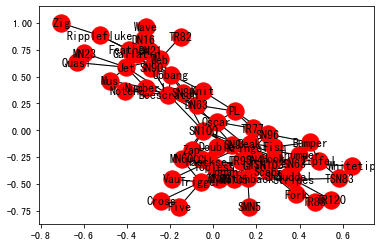

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [5]:
# 可视化
plot_graph(G)
print(list(G.nodes()))

In [6]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A)
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)

# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)


['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]
D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  

In [7]:
# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 6))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return (abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)

W_1=
 [[-2.34325652e-01  5.08619109e-02 -4.35917749e-01 -1.31616605e+00
   1.49161045e-01  1.34694127e+00]
 [ 8.68006462e-01 -2.55051649e-01 -1.18873973e-01 -2.05270929e+00
   6.87530620e-01  3.29242209e-01]
 [ 2.07757178e+00  6.78909468e-02 -8.71704797e-02 -1.70277750e+00
   1.05642529e+00  1.19147294e+00]
 [-2.54624180e-01  1.49109272e+00  1.50881368e+00  1.18043601e+00
   9.68747593e-01  1.27321940e+00]
 [-1.17759481e-01 -5.92477471e-01  4.58861875e-01 -7.77461882e-01
  -1.15199865e+00 -1.41332545e+00]
 [-7.84489732e-02  9.83767193e-01 -2.71568066e-01 -4.73347803e-02
  -5.94369137e-01  4.44329509e-01]
 [ 1.11791107e-01 -1.62321190e+00 -2.07578887e+00  1.44905372e+00
   1.10313415e+00  1.43945588e+00]
 [-2.74995560e-01  8.29168390e-01  3.83786392e-01 -2.75769070e-01
   9.42413640e-02 -4.00717233e-01]
 [-4.54797949e-01 -1.46708704e+00  7.97015312e-01 -1.21133901e+00
   7.58225433e-01  3.97060652e-01]
 [-2.03628179e+00  6.43500296e-01 -9.49097750e-02 -7.70376963e-02
   6.52264473e-01  

feature_representations=
 {'Beak': array([0.3468539 , 0.17420828]), 'Beescratch': array([0.04975142, 0.30438426]), 'Bumper': array([0.19593242, 0.25277952]), 'CCL': array([0.38390292, 0.27154942]), 'Cross': array([0.0031847 , 0.09970983]), 'DN16': array([0.1773006, 0.586093 ]), 'DN21': array([0.        , 0.66396221]), 'DN63': array([0.26513441, 0.2024831 ]), 'Double': array([0.1549207 , 0.16826717]), 'Feather': array([0.        , 0.62184516]), 'Fish': array([0.13618865, 0.06306262]), 'Five': array([0.        , 0.63683686]), 'Fork': array([0.06307149, 1.0359301 ]), 'Gallatin': array([0.        , 0.63765844]), 'Grin': array([0.38431038, 0.35341092]), 'Haecksel': array([0.55904901, 0.3253949 ]), 'Hook': array([0.25977316, 0.11906252]), 'Jet': array([0.06542986, 0.47943407]), 'Jonah': array([0.30618785, 0.45257986]), 'Knit': array([0.24127037, 0.17325776]), 'Kringel': array([0.35825923, 0.12954936]), 'MN105': array([0.05100125, 0.34621574]), 'MN23': array([0.15688016, 0.65582249]), 'MN60':

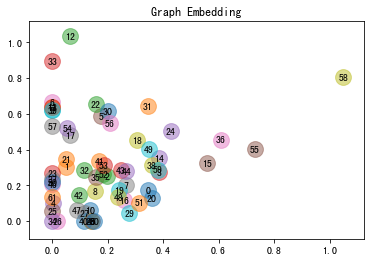

In [8]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        value = G.nodes[node_name]
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()
plot_node(output, 'Graph Embedding')

output(No relu)=
: [[ 0.1806495  -0.48775104]
 [-0.01925054  0.13717132]
 [-0.18190721 -0.46830091]
 [ 0.40452653  0.12305704]
 [-0.51778609 -0.62902308]
 [ 0.13671442  0.62703105]
 [-0.08693686  0.6789174 ]
 [ 0.3570345   0.03732925]
 [ 0.00493431 -0.04566085]
 [-0.09983284  0.56730515]
 [-0.24810014 -0.81996445]
 [-0.5535087   0.53117789]
 [-0.17436975  0.84099418]
 [-0.10107334  0.58237606]
 [ 0.37806059  0.23445948]
 [ 0.61353605 -0.01415104]
 [ 0.21564622 -0.00297115]
 [-0.07368914  0.3670094 ]
 [ 0.11719453  0.21749493]
 [ 0.36687087 -0.04067541]
 [ 0.38192872 -0.2698958 ]
 [-0.23467466  0.15194139]
 [ 0.23273785  0.78840563]
 [-0.39018336 -0.15032464]
 [ 0.26911267  0.33308194]
 [-0.26874765 -0.28475724]
 [-0.25919021 -0.48316845]
 [-0.01290691 -0.2803428 ]
 [ 0.01035548 -0.57755652]
 [ 0.19474206 -0.52928428]
 [-0.37575819  0.31972087]
 [ 0.12092457  0.46031129]
 [ 0.29095517 -0.0871852 ]
 [-2.07656353  0.08167529]
 [-0.2794524  -0.53800889]
 [ 0.04093826  0.12284483]
 [ 0.6809

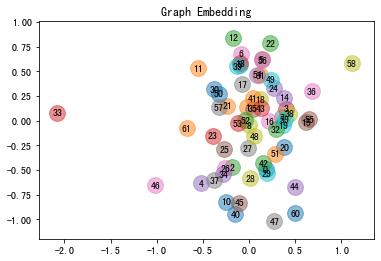

In [9]:
# 去掉激活函数relu的效果，反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(No relu)=\n:",output)

plot_node(output, 'Graph Embedding')